# 2.  Using your select stock / market index and your decision criterion (bi-nary or ternary) can you generate a correlation visualization of volume, and the moving average (with a period of 5, 10, 20, 50 or 200).

In [1]:
import pandas as pd
import os


DATA_FILEPATH = "data/CAC40.csv"

def fetch_data():
    """Import the data from csv to pd dataframe"""
    relaviteFilepath = os.path.join(os.path.abspath(''), DATA_FILEPATH)
    return pd.read_csv(relaviteFilepath)

# df stands for dataframe. This is the object that we will manipulate throughouht the notebook
cac40df = fetch_data()
cac40df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-03-01,1836.000000,1838.000000,1827.000000,1832.000000,1832.000000,0
1,1990-03-02,1831.000000,1860.000000,1831.000000,1860.000000,1860.000000,0
2,1990-03-05,1866.000000,1874.000000,1862.000000,1874.000000,1874.000000,0
3,1990-03-06,1869.000000,1875.000000,1866.000000,1872.000000,1872.000000,0
4,1990-03-07,1874.000000,1881.000000,1874.000000,1880.000000,1880.000000,0
...,...,...,...,...,...,...,...
7999,2021-09-15,6654.830078,6659.270020,6577.020020,6583.620117,6583.620117,81904200
8000,2021-09-16,6613.709961,6663.410156,6612.160156,6622.589844,6622.589844,79574500
8001,2021-09-17,6679.450195,6697.080078,6551.620117,6570.189941,6570.189941,214025500
8002,2021-09-20,6450.390137,6471.089844,6389.620117,6455.810059,6455.810059,120069400


* Add the MA

In [2]:
maWindows = [20, 50, 200]


for maWindow in maWindows:
    colName = f"ma{maWindow}"
    cac40df[colName] = cac40df["Close"].rolling(maWindow).mean()

cac40df

,Date,Open,High,Low,Close,Adj Close,Volume,ma20,ma50,ma200
0,1990-03-01,1836.000000,1838.000000,1827.000000,1832.000000,1832.000000,0,NaN,NaN,NaN
1,1990-03-02,1831.000000,1860.000000,1831.000000,1860.000000,1860.000000,0,NaN,NaN,NaN
2,1990-03-05,1866.000000,1874.000000,1862.000000,1874.000000,1874.000000,0,NaN,NaN,NaN
3,1990-03-06,1869.000000,1875.000000,1866.000000,1872.000000,1872.000000,0,NaN,NaN,NaN
4,1990-03-07,1874.000000,1881.000000,1874.000000,1880.000000,1880.000000,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7999,2021-09-15,6654.830078,6659.270020,6577.020020,6583.620117,6583.620117,81904200,6679.177539,6654.120215,6180.638843
8000,2021-09-16,6613.709961,6663.410156,6612.160156,6622.589844,6622.589844,79574500,6680.012524,6658.637412,6185.706042
8001,2021-09-17,6679.450195,6697.080078,6551.620117,6570.189941,6570.189941,214025500,6677.216528,6659.452812,6190.690093
8002,2021-09-20,6450.390137,6471.089844,6389.620117,6455.810059,6455.810059,120069400,6665.852026,6657.384014,6195.165793


* Add the label

In [3]:
from math import isnan

def prediction(number):
    #Up
    if isnan(number):
        return float('NaN')
    if number > threshold:
        return 1 
    #Down
    if number < -threshold:
        return 2
    #Flat
    return 0

In [4]:
#Daily return on closing price
cac40df["Daily_return"] = (cac40df["Close"] - cac40df["Close"].shift(1)) / cac40df["Close"].shift(1)

#Label
threshold = 0.005
cac40df["Prediction_nbr"] = cac40df["Daily_return"].apply(prediction)
print(cac40df)
#Shift to have next day prediction
cac40df["Prediction_nbr"] = cac40df["Prediction_nbr"].shift(-1)

#Drop all the cols with Nana (MA, shifts)
cac40df.dropna(inplace=True)

            Date         Open         High          Low        Close  \
0     1990-03-01  1836.000000  1838.000000  1827.000000  1832.000000   
1     1990-03-02  1831.000000  1860.000000  1831.000000  1860.000000   
2     1990-03-05  1866.000000  1874.000000  1862.000000  1874.000000   
3     1990-03-06  1869.000000  1875.000000  1866.000000  1872.000000   
4     1990-03-07  1874.000000  1881.000000  1874.000000  1880.000000   
...          ...          ...          ...          ...          ...   
7999  2021-09-15  6654.830078  6659.270020  6577.020020  6583.620117   
8000  2021-09-16  6613.709961  6663.410156  6612.160156  6622.589844   
8001  2021-09-17  6679.450195  6697.080078  6551.620117  6570.189941   
8002  2021-09-20  6450.390137  6471.089844  6389.620117  6455.810059   
8003  2021-09-21  6513.750000  6570.129883  6513.750000  6552.729980   

        Adj Close     Volume         ma20         ma50        ma200  \
0     1832.000000          0          NaN          NaN          

## (a)  select the two features that have the most significant correlation to the target feature, daily return.

We use the corelation matrix to find the best feature

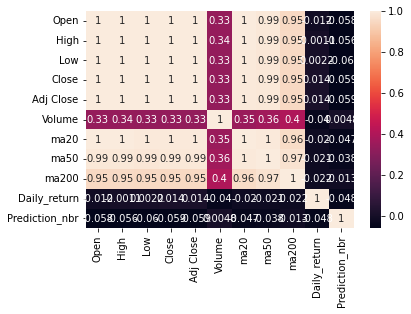

In [5]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = cac40df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [6]:
labelName = "Prediction_nbr"

target = abs(corrMatrix[labelName])

#Drop the survived line
target.drop(labels=labelName, inplace=True)

#Oder the serie
ordered = target.sort_values(ascending=False)
print(f"Ordered : \n{ordered}")

Ordered : 
Low             0.060480
Close           0.059345
Adj Close       0.059345
Open            0.057662
High            0.056486
Daily_return    0.047789
ma20            0.047088
ma50            0.038107
ma200           0.012596
Volume          0.004843
Name: Prediction_nbr, dtype: float64


The MA20 seems to be the most correlated one, although the corelation matrix is clear: the daily return is highly correlated to the... highly return and that's all.\
For the most related features we can take ma20 and ma50, but they are highly related and not independant. We will try to also take the close as we know that encounters can generate signals, but we should probably create a new "signal" feature.

## (b) Using Naive Bayes classifier and the most two significant features, predict daily return. You can learn on all days except the last 100 (that will be used as the test set).

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

possibilities = [["ma20", "Volume"], ["ma20", "Close"], ["ma20", "ma50"], ["Low", "Close"]]
rowCount = len(cac40df)
testSize = 100
trainSize = rowCount - testSize

maxAcc = 0
maxPoss = None
for possibility in possibilities:
    print(f"Trying with {possibility}")

    x,y = cac40df[possibility], cac40df[labelName]

    X_train, X_test, y_train, y_test = x[:trainSize], x[-testSize:], y[:trainSize], y[-testSize:]

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    y_pred = gnb.predict(X_test)

    accuracy = round(100*accuracy_score(y_test, y_pred), 1)
    print(f"accuracy : {accuracy}%")
    if accuracy > maxAcc:
        maxAcc, maxPoss = accuracy, possibility

print(f"Combo {maxPoss} wins with an accuracy of {maxAcc}%")

Trying with ['ma20', 'Volume']
accuracy : 55.0%
Trying with ['ma20', 'Close']
accuracy : 53.0%
Trying with ['ma20', 'ma50']
accuracy : 53.0%
Trying with ['Low', 'Close']
accuracy : 53.0%
Combo ['ma20', 'Volume'] wins with an accuracy of 55.0%


The ma20 + volume seems to be the best combination of features. This is still a basic feature and predictors such as signals (ex: when the close touches the ma) or oscillators could be better predictors for the market, the MA beeing a basic one.